In [6]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#here i need to importt the data with clusters
data_path = '../sales_data_sample.csv'
data = pd.read_csv(data_path, encoding = 'unicode-escape')

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
data.iloc[:2]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


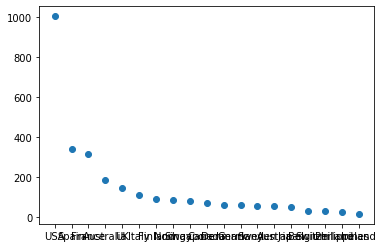

In [13]:
plt.scatter(data['COUNTRY'].value_counts().index, data['COUNTRY'].value_counts())

In [15]:
from sklearn.model_selection import train_test_split

In [ ]:
feature = data.drop('CLUSTER', inplace= True)
target = data['CLUSTER'].values
x_train, x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2, random_state=33)

In [ ]:
#convert them into tensors
x_train= torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
#for y we need it to be a column vector
y_test = torch.LongTensor(y_test).reshape(-1,1)
y_train = torch.LongTensor(y_train).reshape(-1,1)

In [20]:
#pytorch utility for data
from torch.utils.data import TensorDataset, DataLoader